In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [5]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [10]:
# (50000, ): 1D -> List
# (50000, 1): 2D -> 表格 -> 1行 50000列
print(y_train.shape)
y_train

(50000, 1)


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
trans = ["airplane", "automobile", "bird",
         "cat", "deer", "dog", "frog",
         "horse", "ship", "truck"]

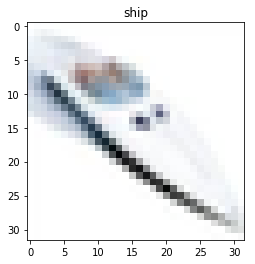

In [13]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
idx = random.randint(0, 49999)
plt.title(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

cnn = Sequential()
# CNN Layer
# 3 * 3 * 3(1 filter) * 64 + 64(bias) = 1792
cnn.add(Conv2D(64, (3, 3), 
               padding="same", 
               activation="relu",
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D())
# 3 * 3 * 64(1 filter) * 128 + 128(bias) = 73856
cnn.add(Conv2D(128, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
# MLP Layer
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="relu"))


cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________